In [113]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [114]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

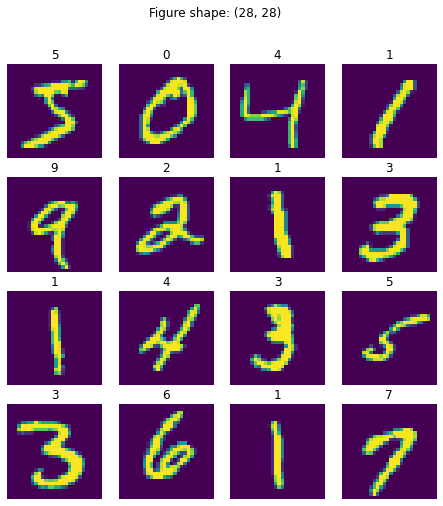

In [115]:
n_samples = 16
n_columns = 4
n_rows = int(n_samples/n_columns)
fig, ax = plt.subplots(n_columns, n_rows, squeeze=True, gridspec_kw={'hspace': 0.2, 'wspace': 0}, figsize = (8,8))
ax = ax.ravel()
range_ = np.random.randint(0, train_data.shape[0], size=n_samples)
for i in range(len(range_)):
    ax[i].axis('off')
    ax[i].imshow(train_data[i])
    ax[i].set_title(str(train_labels[i]))
    # ax[i].xlabel(str(train_labels[i]))ç
fig.suptitle('Figure shape: {}'.format(train_data[0].shape))
plt.show()

In [116]:
shape = train_data[0].shape
shape = shape[0] * shape[1]

In [117]:
model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_shape=(28*28)))
model.add(layers.Dense(512,activation='relu', input_shape=(shape,)))
model.add(layers.Dense(10, activation='softmax'))

In [118]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [119]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [120]:
x_train = train_data.reshape((60000,shape))
x_train = x_train.astype(np.float32) / 255

x_test = test_data.reshape((10000, shape))
x_test = x_test.astype(np.float32) / 255

In [121]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [122]:
model.fit(x_train, y_train, epochs=5, batch_size=128)
model.evaluate(x_test, y_test)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2564 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1056 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0701 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0510 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9803


[0.06399916857481003, 0.9803000092506409]

In [106]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0634 - accuracy: 0.9826


[0.06336936354637146, 0.9825999736785889]